In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("application_data_new.csv")
df.head(10)

,SK_ID_CURR,TARGET,lokl,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,1,Cash loans,M,202500,406598,24701.0,351000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
1,100003,0,1,Cash loans,F,270000,1293503,35699.0,1129500.0,State servant,Higher education,Married,House or apartment,Core staff
2,100004,0,1,Revolving loans,M,67500,135000,6750.0,135000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
3,100006,0,1,Cash loans,F,135000,312683,29687.0,297000.0,Working,Secondary or secondary special,Civil marriage,House or apartment,Laborers
4,100007,0,1,Cash loans,M,121500,513000,21866.0,513000.0,Working,Secondary or secondary special,Single,House or apartment,Core staff
5,100008,0,1,Cash loans,M,99000,490496,27518.0,454500.0,State servant,Secondary or secondary special,Married,House or apartment,Laborers
6,100009,0,1,Cash loans,F,171000,1560726,41301.0,1395000.0,Commercial associate,Higher education,Married,House or apartment,Accountants
7,100012,0,1,Revolving loans,M,135000,405000,20250.0,405000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
8,100016,0,1,Cash loans,F,67500,80865,5882.0,67500.0,Working,Secondary or secondary special,Married,House or apartment,Laborers
9,100017,0,1,Cash loans,M,225000,918468,28967.0,697500.0,Working,Secondary or secondary special,Married,House or apartment,Drivers


In [ ]:
print(df.shape)
print(df.size)

(276480, 14)
3870720


In [ ]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
lokl,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12
AMT_GOODS_PRICE,249
NAME_INCOME_TYPE,0


In [ ]:
# Replacing the null values in 'AMT_ANNUITY' with the median
median_amt_annuity = df['AMT_ANNUITY'].median()
df['AMT_ANNUITY'].fillna(median_amt_annuity, inplace=True)

# Replacing the null values in 'AMT_GOODS_PRICE' with the median
median_amt_goods_price = df['AMT_GOODS_PRICE'].median()
df['AMT_GOODS_PRICE'].fillna(median_amt_goods_price, inplace=True)

In [ ]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
lokl,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0
NAME_INCOME_TYPE,0


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,lokl,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,276480.000000,276480.000000,276480.0,2.764800e+05,2.764800e+05,276480.000000,2.764800e+05
mean,278230.126595,0.080704,1.0,1.673127e+05,5.923788e+05,26970.109776,5.320496e+05
std,102810.910324,0.272380,0.0,2.455049e+05,3.938030e+05,14189.280097,3.606465e+05
min,100002.000000,0.000000,1.0,2.565000e+04,4.500000e+04,1616.000000,4.050000e+04
25%,189221.750000,0.000000,1.0,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05
50%,278337.500000,0.000000,1.0,1.440000e+05,5.094000e+05,24836.000000,4.500000e+05
75%,367214.250000,0.000000,1.0,2.025000e+05,8.086500e+05,34511.000000,6.795000e+05
max,456255.000000,1.000000,1.0,1.170000e+08,4.050000e+06,230162.000000,4.050000e+06


In [ ]:
# List of the columns with object (string) data types
object_columns = df.select_dtypes(include='object').columns

# Creating a dictionary to store the unique items for each object-type column
unique_items = {col: df[col].unique().tolist() for col in object_columns}

# Displaying the unique items
unique_items


{'NAME_CONTRACT_TYPE': ['Cash loans', 'Revolving loans'],
 'CODE_GENDER': ['M', 'F', 'XNA'],
 'NAME_INCOME_TYPE': ['Working',
  'State servant',
  'Commercial associate',
  'Student',
  'Pensioner',
  'Maternity leave',
  'Unemployed',
  'Businessman'],
 'NAME_EDUCATION_TYPE': ['Secondary or secondary special',
  'Higher education',
  'Incomplete higher',
  'Lower secondary',
  'Academic degree'],
 'NAME_FAMILY_STATUS': ['Single',
  'Married',
  'Civil marriage',
  'Widow',
  'Separated'],
 'NAME_HOUSING_TYPE': ['House or apartment',
  'Rented apartment',
  'With parents',
  'Municipal apartment',
  'Office apartment',
  'Co-op apartment'],
 'OCCUPATION_TYPE': ['Laborers',
  'Core staff',
  'Accountants',
  'Drivers',
  'Sales staff',
  'Cleaning staff',
  'Private service staff',
  'Managers',
  'Medicine staff',
  'Cooking staff',
  'High skill tech staff',
  'Low-skill Laborers',
  'Security staff',
  'Realty agents',
  'Secretaries',
  'Waiters/barmen staff',
  'IT staff',
  'HR st

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

Numerical type columns:
Index(['SK_ID_CURR', 'TARGET', 'lokl', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE'],
      dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
Non-Categorical Features: []
Discrete Features: ['TARGET', 'lokl']
Continuous Features: ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']


In [ ]:
#Univariate visualization
display(df.select_dtypes(include = 'object').describe())

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,276480,276480,276480,276480,276480,276480,276480
unique,2,3,8,5,5,6,19
top,Cash loans,F,Working,Secondary or secondary special,Married,House or apartment,No Occupation
freq,251870,184190,140679,199133,176742,245693,96391


In [ ]:
display(df.select_dtypes(include = int).describe())

,SK_ID_CURR,TARGET,lokl,AMT_INCOME_TOTAL,AMT_CREDIT
count,276480.000000,276480.000000,276480.0,2.764800e+05,2.764800e+05
mean,278230.126595,0.080704,1.0,1.673127e+05,5.923788e+05
std,102810.910324,0.272380,0.0,2.455049e+05,3.938030e+05
min,100002.000000,0.000000,1.0,2.565000e+04,4.500000e+04
25%,189221.750000,0.000000,1.0,1.125000e+05,2.700000e+05
50%,278337.500000,0.000000,1.0,1.440000e+05,5.094000e+05
75%,367214.250000,0.000000,1.0,2.025000e+05,8.086500e+05
max,456255.000000,1.000000,1.0,1.170000e+08,4.050000e+06


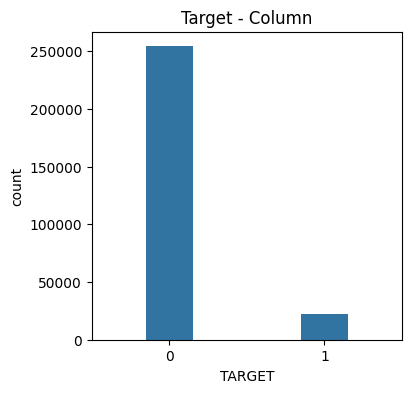

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data = df, x = "TARGET", legend='auto', width = 0.3)
plt.title("Target - Column")
plt.show()

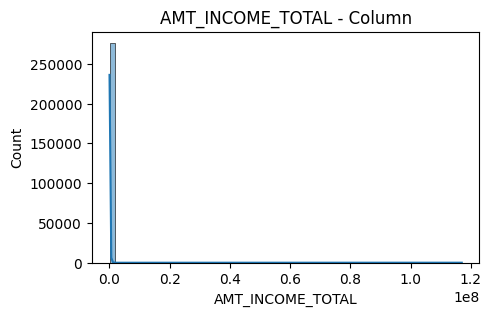

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(df["AMT_INCOME_TOTAL"], bins = 60, kde=True)
plt.title("AMT_INCOME_TOTAL - Column")
plt.show()

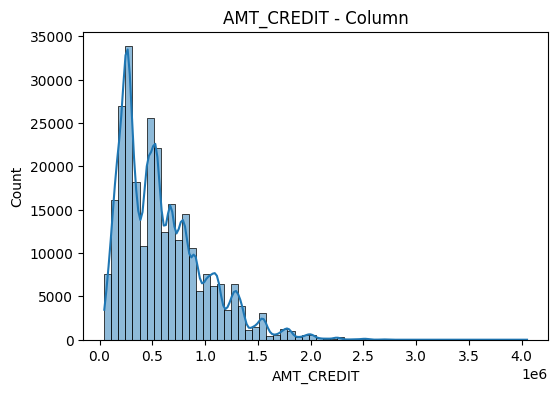

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["AMT_CREDIT"], bins = 60, kde=True)
plt.title("AMT_CREDIT - Column")
plt.show()

In [ ]:
df_int = df.select_dtypes(include = 'number')

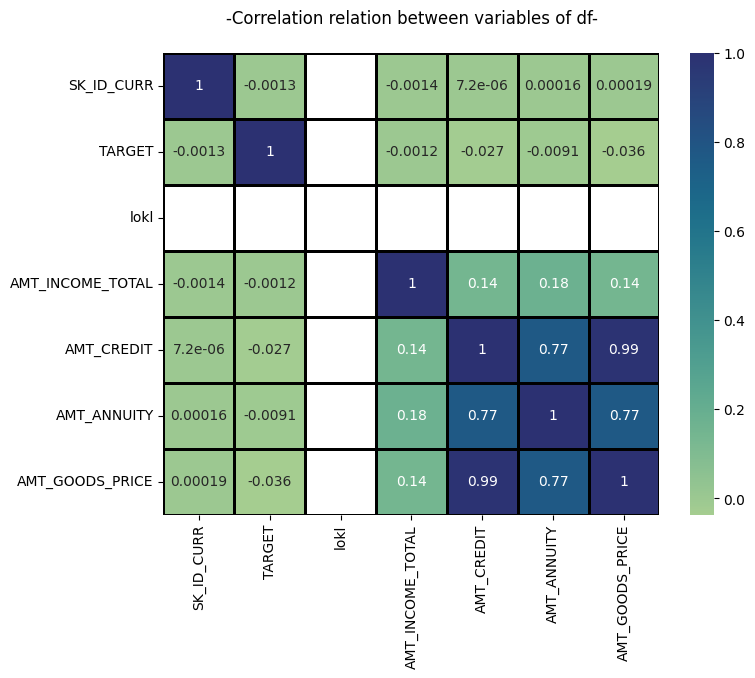

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_int.corr(), annot = True, cmap = 'crest', linecolor = 'black', linewidths = 0.8)
plt.title("-Correlation relation between variables of df-\n")
plt.show()